# Pandas ile Veri Analizi

In [1]:
# gerekli import işlemleri yapıldı

%config IPCompleter.greedy = True
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Belirtilen koşullar doğrultusunda clinical.tsv dosyası okundu.

cancer = pd.read_csv("clinical.tsv", sep='\t')
cancer.replace(["'--"] , np.nan, inplace=True)
cancer.dropna(axis=1, inplace=True,how='all')
cancer

,case_id,case_submitter_id,project_id,age_at_index,days_to_birth,days_to_death,ethnicity,gender,race,vital_status,...,prior_treatment,progression_or_recurrence,secondary_gleason_grade,site_of_resection_or_biopsy,synchronous_malignancy,tissue_or_organ_of_origin,tumor_grade,year_of_diagnosis,treatment_or_therapy,treatment_type
0,02f5ae33-a563-4ecb-9e33-dfa500a44931,TCGA-A8-A093,TCGA-BRCA,61,-22373,NaN,not reported,female,not reported,Alive,...,No,not reported,NaN,"Breast, NOS",Not Reported,"Breast, NOS",not reported,2009,yes,"Radiation Therapy, NOS"
1,02f5ae33-a563-4ecb-9e33-dfa500a44931,TCGA-A8-A093,TCGA-BRCA,61,-22373,NaN,not reported,female,not reported,Alive,...,No,not reported,NaN,"Breast, NOS",Not Reported,"Breast, NOS",not reported,2009,yes,"Pharmaceutical Therapy, NOS"
2,18b8ad7f-0f39-4853-ae13-5b13aa5e6f7d,TCGA-V1-A9OT,TCGA-PRAD,61,-22630,NaN,not hispanic or latino,male,white,Alive,...,No,not reported,Pattern 3,Prostate gland,No,Prostate gland,not reported,NaN,no,"Radiation Therapy, NOS"
3,18b8ad7f-0f39-4853-ae13-5b13aa5e6f7d,TCGA-V1-A9OT,TCGA-PRAD,61,-22630,NaN,not hispanic or latino,male,white,Alive,...,No,not reported,Pattern 3,Prostate gland,No,Prostate gland,not reported,NaN,no,"Pharmaceutical Therapy, NOS"
4,6696cf88-3c43-482c-aabb-f1ea5cf565aa,TCGA-QS-A5YR,TCGA-UCEC,61,-22372,NaN,not hispanic or latino,female,black or african american,Alive,...,No,not reported,NaN,Endometrium,No,Endometrium,not reported,2012,no,"Radiation Therapy, NOS"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18957,a6cda2a0-21d9-4b72-a4c5-de1142d7ddb8,TCGA-14-1043,TCGA-GBM,61,-22392,24,not reported,male,white,Dead,...,No,not reported,NaN,"Brain, NOS",Not Reported,"Brain, NOS",not reported,2004,yes,"Radiation Therapy, NOS"
18958,fb79c491-7b01-42ae-8369-8364e442e31b,TCGA-44-2665,TCGA-LUAD,55,-20349,NaN,not hispanic or latino,female,white,Alive,...,No,not reported,NaN,"Upper lobe, lung",No,"Upper lobe, lung",not reported,2009,yes,"Pharmaceutical Therapy, NOS"
18959,fb79c491-7b01-42ae-8369-8364e442e31b,TCGA-44-2665,TCGA-LUAD,55,-20349,NaN,not hispanic or latino,female,white,Alive,...,No,not reported,NaN,"Upper lobe, lung",No,"Upper lobe, lung",not reported,2009,no,"Radiation Therapy, NOS"
18960,c95ed407-bcc2-44aa-bc59-bf7549f2d665,TCGA-FV-A23B,TCGA-LIHC,70,-25788,1852,not hispanic or latino,female,white,Dead,...,No,not reported,NaN,Liver,No,Liver,not reported,2005,no,"Radiation Therapy, NOS"


In [3]:
# Verilen sütunlar ile filtre işlemi yapıldı.

cancer = cancer.filter(['case_submitter_id', 'age_at_index', 'days_to_death', 'gender', 'race', 'vital_status', 
                'year_of_birth', 'year_of_death', 'age_at_diagnosis', 'ajcc_pathologic_stage', 
                'icd_10_code', 'primary_diagnosis', 'prior_malignancy', 'prior_treatment', 
                'site_of_resection_or_biopsy', 'synchronous_malignancy', 'tissue_or_organ_of_origin', 
                'year_of_diagnosis', 'treatment_type'])


In [4]:
# NaN değerler çıkarıldığında silinen satır sayısı yazdırıldı.

rows_ilk = len(cancer)

cancer.dropna(inplace=True)

rows_son = len(cancer)

print ("Silinen satır sayısı :" , rows_ilk-rows_son)

cancer

Silinen satır sayısı : 16402


,case_submitter_id,age_at_index,days_to_death,gender,race,vital_status,year_of_birth,year_of_death,age_at_diagnosis,ajcc_pathologic_stage,icd_10_code,primary_diagnosis,prior_malignancy,prior_treatment,site_of_resection_or_biopsy,synchronous_malignancy,tissue_or_organ_of_origin,year_of_diagnosis,treatment_type
38,TCGA-CV-5970,59,406,male,white,Dead,1950,2010,21890,Stage IVA,C02.9,"Squamous cell carcinoma, NOS",no,No,"Tongue, NOS",No,"Tongue, NOS",2009,"Radiation Therapy, NOS"
39,TCGA-CV-5970,59,406,male,white,Dead,1950,2010,21890,Stage IVA,C02.9,"Squamous cell carcinoma, NOS",no,No,"Tongue, NOS",No,"Tongue, NOS",2009,"Pharmaceutical Therapy, NOS"
40,TCGA-2H-A9GO,58,494,male,not reported,Dead,1942,2001,21486,Stage IVA,C15.5,"Adenocarcinoma, NOS",no,No,Lower third of esophagus,No,Lower third of esophagus,2000,"Pharmaceutical Therapy, NOS"
41,TCGA-2H-A9GO,58,494,male,not reported,Dead,1942,2001,21486,Stage IVA,C15.5,"Adenocarcinoma, NOS",no,No,Lower third of esophagus,No,Lower third of esophagus,2000,"Radiation Therapy, NOS"
68,TCGA-BA-4074,69,462,male,white,Dead,1934,2004,25282,Stage IVA,C02.9,"Squamous cell carcinoma, NOS",no,No,"Tongue, NOS",No,"Tongue, NOS",2003,"Radiation Therapy, NOS"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18927,TCGA-SC-A6LM,64,881,female,white,Dead,1946,2012,23400,Stage IV,C45.0,"Epithelioid mesothelioma, malignant",no,No,"Pleura, NOS",No,"Pleura, NOS",2010,"Radiation Therapy, NOS"
18928,TCGA-51-4080,65,12,male,black or african american,Dead,1944,2009,24054,Stage IIIB,C34.1,Basaloid squamous cell carcinoma,no,No,"Upper lobe, lung",No,"Upper lobe, lung",2009,"Radiation Therapy, NOS"
18929,TCGA-51-4080,65,12,male,black or african american,Dead,1944,2009,24054,Stage IIIB,C34.1,Basaloid squamous cell carcinoma,no,No,"Upper lobe, lung",No,"Upper lobe, lung",2009,"Pharmaceutical Therapy, NOS"
18932,TCGA-G2-A3IE,51,612,male,white,Dead,1956,2008,18983,Stage II,C67.9,Transitional cell carcinoma,no,No,"Bladder, NOS",No,"Bladder, NOS",2007,"Pharmaceutical Therapy, NOS"


In [5]:
# Verilen string'ler çıkartıldı ve silinen satır sayısı hesaplandı.

rows_ilk = len(cancer)

cancer = cancer[(~cancer.eq("not reported").any(1)) & (~cancer.eq("Not Reported").any(1))]


rows_son = len(cancer)

print ("Silinen satır sayısı :" , rows_ilk-rows_son)

cancer

Silinen satır sayısı : 506


,case_submitter_id,age_at_index,days_to_death,gender,race,vital_status,year_of_birth,year_of_death,age_at_diagnosis,ajcc_pathologic_stage,icd_10_code,primary_diagnosis,prior_malignancy,prior_treatment,site_of_resection_or_biopsy,synchronous_malignancy,tissue_or_organ_of_origin,year_of_diagnosis,treatment_type
38,TCGA-CV-5970,59,406,male,white,Dead,1950,2010,21890,Stage IVA,C02.9,"Squamous cell carcinoma, NOS",no,No,"Tongue, NOS",No,"Tongue, NOS",2009,"Radiation Therapy, NOS"
39,TCGA-CV-5970,59,406,male,white,Dead,1950,2010,21890,Stage IVA,C02.9,"Squamous cell carcinoma, NOS",no,No,"Tongue, NOS",No,"Tongue, NOS",2009,"Pharmaceutical Therapy, NOS"
68,TCGA-BA-4074,69,462,male,white,Dead,1934,2004,25282,Stage IVA,C02.9,"Squamous cell carcinoma, NOS",no,No,"Tongue, NOS",No,"Tongue, NOS",2003,"Radiation Therapy, NOS"
69,TCGA-BA-4074,69,462,male,white,Dead,1934,2004,25282,Stage IVA,C02.9,"Squamous cell carcinoma, NOS",no,No,"Tongue, NOS",No,"Tongue, NOS",2003,"Pharmaceutical Therapy, NOS"
88,TCGA-CN-A642,57,82,male,white,Dead,1955,2012,21011,Stage IVB,C02.9,"Squamous cell carcinoma, NOS",no,No,"Tongue, NOS",No,"Tongue, NOS",2012,"Radiation Therapy, NOS"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18927,TCGA-SC-A6LM,64,881,female,white,Dead,1946,2012,23400,Stage IV,C45.0,"Epithelioid mesothelioma, malignant",no,No,"Pleura, NOS",No,"Pleura, NOS",2010,"Radiation Therapy, NOS"
18928,TCGA-51-4080,65,12,male,black or african american,Dead,1944,2009,24054,Stage IIIB,C34.1,Basaloid squamous cell carcinoma,no,No,"Upper lobe, lung",No,"Upper lobe, lung",2009,"Radiation Therapy, NOS"
18929,TCGA-51-4080,65,12,male,black or african american,Dead,1944,2009,24054,Stage IIIB,C34.1,Basaloid squamous cell carcinoma,no,No,"Upper lobe, lung",No,"Upper lobe, lung",2009,"Pharmaceutical Therapy, NOS"
18932,TCGA-G2-A3IE,51,612,male,white,Dead,1956,2008,18983,Stage II,C67.9,Transitional cell carcinoma,no,No,"Bladder, NOS",No,"Bladder, NOS",2007,"Pharmaceutical Therapy, NOS"


In [6]:
# Tekrar eden case_submitter_id'ler silindi

cancer = cancer.drop_duplicates(subset = 'case_submitter_id' )
cancer

,case_submitter_id,age_at_index,days_to_death,gender,race,vital_status,year_of_birth,year_of_death,age_at_diagnosis,ajcc_pathologic_stage,icd_10_code,primary_diagnosis,prior_malignancy,prior_treatment,site_of_resection_or_biopsy,synchronous_malignancy,tissue_or_organ_of_origin,year_of_diagnosis,treatment_type
38,TCGA-CV-5970,59,406,male,white,Dead,1950,2010,21890,Stage IVA,C02.9,"Squamous cell carcinoma, NOS",no,No,"Tongue, NOS",No,"Tongue, NOS",2009,"Radiation Therapy, NOS"
68,TCGA-BA-4074,69,462,male,white,Dead,1934,2004,25282,Stage IVA,C02.9,"Squamous cell carcinoma, NOS",no,No,"Tongue, NOS",No,"Tongue, NOS",2003,"Radiation Therapy, NOS"
88,TCGA-CN-A642,57,82,male,white,Dead,1955,2012,21011,Stage IVB,C02.9,"Squamous cell carcinoma, NOS",no,No,"Tongue, NOS",No,"Tongue, NOS",2012,"Radiation Therapy, NOS"
104,TCGA-2J-AABA,55,607,male,white,Dead,1957,2013,20133,Stage IIB,C25.0,"Infiltrating duct carcinoma, NOS",no,No,Head of pancreas,No,Head of pancreas,2012,"Radiation Therapy, NOS"
108,TCGA-62-8398,55,444,male,white,Dead,1952,2008,20197,Stage IIIA,C34.3,Adenocarcinoma with mixed subtypes,no,No,"Lower lobe, lung",No,"Lower lobe, lung",2007,"Pharmaceutical Therapy, NOS"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18898,TCGA-3A-A9IZ,47,308,male,white,Dead,1965,2012,17294,Stage IIB,C25.0,"Infiltrating duct carcinoma, NOS",no,No,Head of pancreas,No,Head of pancreas,2012,"Radiation Therapy, NOS"
18916,TCGA-R5-A7ZF,65,259,female,black or african american,Dead,1947,2012,23908,Stage IV,C16.3,"Adenocarcinoma, intestinal type",no,No,Gastric antrum,No,Gastric antrum,2012,"Radiation Therapy, NOS"
18926,TCGA-SC-A6LM,64,881,female,white,Dead,1946,2012,23400,Stage IV,C45.0,"Epithelioid mesothelioma, malignant",no,No,"Pleura, NOS",No,"Pleura, NOS",2010,"Pharmaceutical Therapy, NOS"
18928,TCGA-51-4080,65,12,male,black or african american,Dead,1944,2009,24054,Stage IIIB,C34.1,Basaloid squamous cell carcinoma,no,No,"Upper lobe, lung",No,"Upper lobe, lung",2009,"Radiation Therapy, NOS"


In [7]:
# case_submitter_id index yapıldı

cancer = cancer.set_index('case_submitter_id')
cancer.head()

,age_at_index,days_to_death,gender,race,vital_status,year_of_birth,year_of_death,age_at_diagnosis,ajcc_pathologic_stage,icd_10_code,primary_diagnosis,prior_malignancy,prior_treatment,site_of_resection_or_biopsy,synchronous_malignancy,tissue_or_organ_of_origin,year_of_diagnosis,treatment_type
case_submitter_id,,,,,,,,,,,,,,,,,,
TCGA-CV-5970,59,406,male,white,Dead,1950,2010,21890,Stage IVA,C02.9,"Squamous cell carcinoma, NOS",no,No,"Tongue, NOS",No,"Tongue, NOS",2009,"Radiation Therapy, NOS"
TCGA-BA-4074,69,462,male,white,Dead,1934,2004,25282,Stage IVA,C02.9,"Squamous cell carcinoma, NOS",no,No,"Tongue, NOS",No,"Tongue, NOS",2003,"Radiation Therapy, NOS"
TCGA-CN-A642,57,82,male,white,Dead,1955,2012,21011,Stage IVB,C02.9,"Squamous cell carcinoma, NOS",no,No,"Tongue, NOS",No,"Tongue, NOS",2012,"Radiation Therapy, NOS"
TCGA-2J-AABA,55,607,male,white,Dead,1957,2013,20133,Stage IIB,C25.0,"Infiltrating duct carcinoma, NOS",no,No,Head of pancreas,No,Head of pancreas,2012,"Radiation Therapy, NOS"
TCGA-62-8398,55,444,male,white,Dead,1952,2008,20197,Stage IIIA,C34.3,Adenocarcinoma with mixed subtypes,no,No,"Lower lobe, lung",No,"Lower lobe, lung",2007,"Pharmaceutical Therapy, NOS"


In [8]:
# Satır ve sütun yazdırıldı.

print("Satır sayısı:" , len(cancer) , "\nSütun sayısı:", len(cancer.columns))

Satır sayısı: 1027 
Sütun sayısı: 18


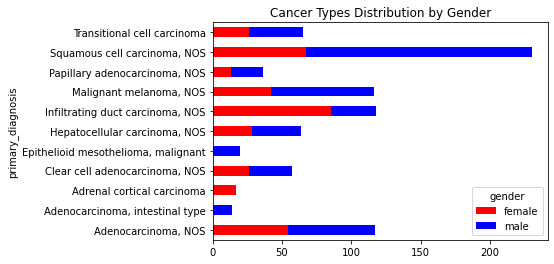

In [9]:
# En az 10 hasta içeren kanser türlerinin cinsiyete göre dağılımı yatay yığılmış sütun grafik olarak çıktısı alındı.

cancer_gender = cancer.groupby(['primary_diagnosis']).gender.value_counts()

cancer_gender = cancer_gender[cancer_gender > 10]

cancer_gender.unstack('gender').plot.barh(stacked=True , title = "Cancer Types Distribution by Gender" , color=("red","blue"))
plt.show()



In [10]:
# Kanser türünden kaç hasta olduğu, büyükten küçüğe doğru sıralandı.

cancer_kind = cancer.groupby('primary_diagnosis').size().sort_values(ascending=False)
cancer_kind

primary_diagnosis
Squamous cell carcinoma, NOS                                 230
Infiltrating duct carcinoma, NOS                             118
Adenocarcinoma, NOS                                          117
Malignant melanoma, NOS                                      116
Transitional cell carcinoma                                   65
Hepatocellular carcinoma, NOS                                 64
Clear cell adenocarcinoma, NOS                                57
Papillary adenocarcinoma, NOS                                 36
Epithelioid mesothelioma, malignant                           29
Adrenal cortical carcinoma                                    25
Adenocarcinoma with mixed subtypes                            16
Adenocarcinoma, intestinal type                               16
Tubular adenocarcinoma                                        15
Cholangiocarcinoma                                            15
Mesothelioma, biphasic, malignant                             11
Carcino

In [11]:
# En fazla hasta sayısına sahip kanser türü.
cancer_kind.head(1)

primary_diagnosis
Squamous cell carcinoma, NOS    230
dtype: int64

In [12]:
# En fazla hasta sayısına sahip kanser türünün yaşlara göre dağılımı büyükten küçüğe yazdırıldı.

cancer_group = cancer.groupby('primary_diagnosis')
cancer_group = cancer_group.get_group('Squamous cell carcinoma, NOS')
cancer_groupMax = cancer_group.age_at_index.value_counts().sort_values(ascending=False)
cancer_groupMax

73    12
67    12
60    10
74    10
65    10
69     9
79     8
59     8
64     8
49     7
57     7
55     7
58     7
75     6
76     6
66     6
71     6
80     6
77     5
53     5
62     5
61     5
87     5
78     5
70     5
51     5
63     4
48     4
68     3
56     3
82     3
81     3
40     2
47     2
85     2
72     2
38     2
50     2
90     1
32     1
54     1
45     1
24     1
52     1
83     1
34     1
41     1
88     1
44     1
84     1
29     1
Name: age_at_index, dtype: int64

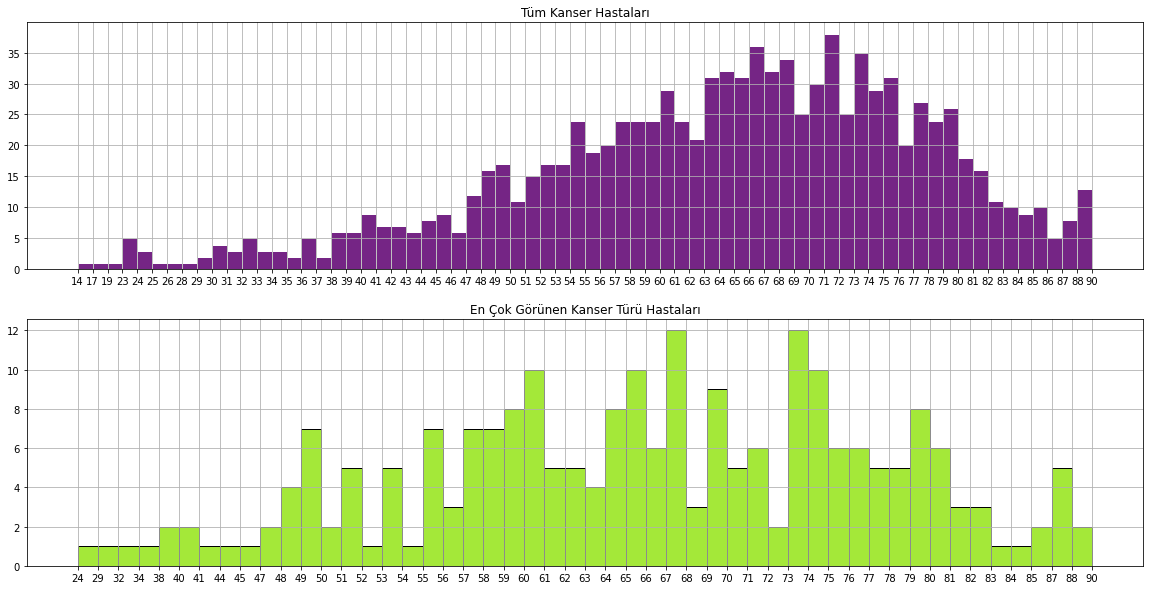

In [13]:
# Histogram grafikleri, başlık verilerek subplot olarak yazdırıldı

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

allfig = cancer.age_at_index.sort_values().hist(bins = 68,color='#752585',edgecolor = 'w',figsize=(20,10),ax=ax1).set_title('Tüm Kanser Hastaları')

cancer_group = cancer.groupby('primary_diagnosis')
cancer_groupMax = cancer_group.get_group('Squamous cell carcinoma, NOS') #string içeriğini çek !!!!!!!

maxfig = cancer_groupMax.age_at_index.sort_values().hist(bins = 50,color='#A4E839',edgecolor = 'k',figsize=(20,10),ax=ax2).set_title('En Çok Görünen Kanser Türü Hastaları')

In [14]:
# days_to_death ortalaması alınarak gruplama yapıldı ve büyükten küçüğe sıralandı. 
# En tepedeki kanser türü yani en yüksek olan kanser türü yazdırıldı.

cancer['days_to_death'] = cancer['days_to_death'].astype(float)
cancer_dd=cancer
cancer_dd.groupby(['primary_diagnosis'])['days_to_death'].value_counts()
cancer_dd.groupby(['primary_diagnosis'])['days_to_death'].mean()
cancer_ddMean = cancer_dd.groupby(['primary_diagnosis'])['days_to_death'].agg('mean').sort_values(ascending=False)
cancer_ddMean.head(1)

primary_diagnosis
Amelanotic melanoma    5237.0
Name: days_to_death, dtype: float64

<AxesSubplot:xlabel='age_at_diagnosis', ylabel='days_to_death'>

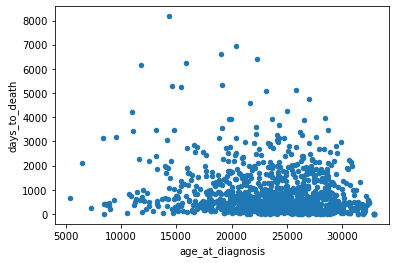

In [15]:
# Kanserin age_at_diagnosis ile hastanın days_to_death arasındaki ilişkiyi gösteren bir saçılım grafiği çizildi.
cancer['age_at_diagnosis'] = cancer['age_at_diagnosis'].astype(float)
cancer.plot.scatter(x='age_at_diagnosis', y = 'days_to_death')

In [16]:
# exposure.tsv dosyası belirtilen koşullar doğrultusunda çekildi.
exposure = pd.read_csv('exposure.tsv',sep='\t')
exposure.replace(["'--","Not Reported"] , np.nan,inplace=True)
exposure

,case_id,case_submitter_id,project_id,age_at_onset,alcohol_days_per_week,alcohol_drinks_per_day,alcohol_history,alcohol_intensity,alcohol_type,asbestos_exposure,...,smoking_frequency,time_between_waking_and_first_smoke,tobacco_smoking_onset_year,tobacco_smoking_quit_year,tobacco_smoking_status,tobacco_use_per_day,type_of_smoke_exposure,type_of_tobacco_used,weight,years_smoked
0,02f5ae33-a563-4ecb-9e33-dfa500a44931,TCGA-A8-A093,TCGA-BRCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18b8ad7f-0f39-4853-ae13-5b13aa5e6f7d,TCGA-V1-A9OT,TCGA-PRAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6696cf88-3c43-482c-aabb-f1ea5cf565aa,TCGA-QS-A5YR,TCGA-UCEC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,027b2a29-2fad-4ca8-a7cd-eb913d0205f8,TCGA-B5-A11J,TCGA-UCEC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,bc3e0b74-ea09-46a5-9f61-16bd15ffd883,TCGA-23-1809,TCGA-OV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9476,29df128d-ace2-40cf-88ee-3f6f2170f159,TCGA-A8-A095,TCGA-BRCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9477,dc22eba5-6fb7-4875-b30a-99fa00758301,TCGA-D5-6920,TCGA-COAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9478,a6cda2a0-21d9-4b72-a4c5-de1142d7ddb8,TCGA-14-1043,TCGA-GBM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9479,fb79c491-7b01-42ae-8369-8364e442e31b,TCGA-44-2665,TCGA-LUAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# case_submitter_id index yapıldı

exposure = exposure.set_index('case_submitter_id')
exposure

,case_id,project_id,age_at_onset,alcohol_days_per_week,alcohol_drinks_per_day,alcohol_history,alcohol_intensity,alcohol_type,asbestos_exposure,bmi,...,smoking_frequency,time_between_waking_and_first_smoke,tobacco_smoking_onset_year,tobacco_smoking_quit_year,tobacco_smoking_status,tobacco_use_per_day,type_of_smoke_exposure,type_of_tobacco_used,weight,years_smoked
case_submitter_id,,,,,,,,,,,,,,,,,,,,,
TCGA-A8-A093,02f5ae33-a563-4ecb-9e33-dfa500a44931,TCGA-BRCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-V1-A9OT,18b8ad7f-0f39-4853-ae13-5b13aa5e6f7d,TCGA-PRAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-QS-A5YR,6696cf88-3c43-482c-aabb-f1ea5cf565aa,TCGA-UCEC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-B5-A11J,027b2a29-2fad-4ca8-a7cd-eb913d0205f8,TCGA-UCEC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-23-1809,bc3e0b74-ea09-46a5-9f61-16bd15ffd883,TCGA-OV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-A8-A095,29df128d-ace2-40cf-88ee-3f6f2170f159,TCGA-BRCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-D5-6920,dc22eba5-6fb7-4875-b30a-99fa00758301,TCGA-COAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-14-1043,a6cda2a0-21d9-4b72-a4c5-de1142d7ddb8,TCGA-GBM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# NaN değerleri olan sütunlar silindi.
exposure.dropna(axis=1, inplace=True,how='all') # hepsi nan ise
exposure.dropna(inplace=True) #herhangi biri nan ise
exposure

,case_id,project_id,alcohol_history,cigarettes_per_day,pack_years_smoked,years_smoked
case_submitter_id,,,,,,
TCGA-2J-AABI,2aaf212f-000a-4a9d-8a4a-198fa94f491e,TCGA-PAAD,Yes,2.3013698630136985,42.0,31.0
TCGA-BB-A6UM,03c3ae62-d0aa-412e-bd3c-4577fc9f919c,TCGA-HNSC,No,5.7534246575342465,105.0,35.0
TCGA-D6-6825,42bc2336-2408-441a-83b9-aadc9700f750,TCGA-HNSC,Yes,16.438356164383563,300.0,54.0
TCGA-CR-7376,b3bed685-e9db-436b-9938-2b8a0a0d5b83,TCGA-HNSC,Yes,2.958904109589041,54.0,18.0
TCGA-CV-7097,9d0f5938-6a01-4c06-8536-dff834f7f2f9,TCGA-HNSC,Yes,3.506849315068493,64.0,32.0
...,...,...,...,...,...,...
TCGA-FB-AAPQ,ecdd0e44-0add-4a08-a3f8-ab2f51df7afd,TCGA-PAAD,No,1.36986301369863,25.0,25.0
TCGA-CV-6952,7ed006e8-461f-4664-bfff-55fa6812743c,TCGA-HNSC,Yes,1.643835616438356,30.0,30.0
TCGA-HZ-A8P0,98f1d0eb-0977-4f53-a3b1-e6875a34c27b,TCGA-PAAD,Yes,1.095890410958904,20.0,20.0


In [19]:
# Satır ve sütun sayısı yazdırıldı.

rows = len(exposure)
columns = len(exposure.columns)


print ("Satır sayısı :" , rows, "\nSütun sayısı: ", columns)

Satır sayısı : 136 
Sütun sayısı:  6


In [20]:
# cancer ve exposure tabloları case_submitter_id'ye göre birleştirildi ve yeni dataFrame'e aktarıldı.

cancer_exposure = pd.merge(cancer,exposure,on = "case_submitter_id")
cancer_exposure

,age_at_index,days_to_death,gender,race,vital_status,year_of_birth,year_of_death,age_at_diagnosis,ajcc_pathologic_stage,icd_10_code,...,synchronous_malignancy,tissue_or_organ_of_origin,year_of_diagnosis,treatment_type,case_id,project_id,alcohol_history,cigarettes_per_day,pack_years_smoked,years_smoked
case_submitter_id,,,,,,,,,,,,,,,,,,,,,
TCGA-CV-7097,53,385.0,male,white,Dead,1949,2003,19382.0,Stage II,C14.8,...,No,"Overlapping lesion of lip, oral cavity and pha...",2002,"Radiation Therapy, NOS",9d0f5938-6a01-4c06-8536-dff834f7f2f9,TCGA-HNSC,Yes,3.506849315068493,64.0,32.0
TCGA-CV-6961,61,76.0,male,white,Dead,1938,1999,22532.0,Stage II,C02.9,...,No,"Tongue, NOS",1999,"Radiation Therapy, NOS",4075717b-2240-4842-a00a-0c4dbcb910c4,TCGA-HNSC,Yes,3.6164383561643834,66.0,33.0
TCGA-CV-A45Y,61,2703.0,male,american indian or alaska native,Dead,1939,2007,22442.0,Stage IVA,C32.9,...,No,"Larynx, NOS",2000,"Radiation Therapy, NOS",468061c2-0acb-4f67-a357-99ccbd81a8b7,TCGA-HNSC,Yes,2.136986301369863,39.0,39.0
TCGA-CV-7568,48,927.0,female,white,Dead,1947,1997,17670.0,Stage IVA,C14.8,...,No,"Overlapping lesion of lip, oral cavity and pha...",1995,"Pharmaceutical Therapy, NOS",fa2d4258-3ee4-4d53-8ef2-9700b5cf38d6,TCGA-HNSC,No,1.917808219178082,35.0,35.0
TCGA-CQ-5325,65,654.0,male,white,Dead,1942,2008,23833.0,Stage I,C02.9,...,No,"Tongue, NOS",2007,"Radiation Therapy, NOS",408c5d54-7888-4955-8386-bf8819b48a6c,TCGA-HNSC,Yes,2.684931506849315,49.0,49.0
TCGA-3A-A9IB,69,224.0,female,white,Dead,1942,2011,25312.0,Stage IIB,C25.0,...,No,Head of pancreas,2011,"Radiation Therapy, NOS",3cbf56e6-dccc-40fe-b06e-2621a2121e9d,TCGA-PAAD,No,0.273972602739726,5.0,20.0
TCGA-P3-A6SX,67,1430.0,male,white,Dead,1938,2008,24715.0,Stage III,C09.9,...,No,"Tonsil, NOS",2005,"Radiation Therapy, NOS",220d75ae-c94b-473a-a988-ac40c15fa219,TCGA-HNSC,Yes,5.47945205479452,100.0,50.0
TCGA-CN-5367,60,352.0,female,white,Dead,1946,2006,22246.0,Stage IVA,C02.9,...,No,"Tongue, NOS",2006,"Radiation Therapy, NOS",61d0709c-d148-413b-a7b5-c0c82ed2f32f,TCGA-HNSC,Yes,2.191780821917808,40.0,40.0
TCGA-CQ-A4C7,88,353.0,male,white,Dead,1922,2010,32194.0,Stage III,C04.9,...,No,"Floor of mouth, NOS",2010,"Radiation Therapy, NOS",134223bd-5c03-4854-a034-ebd2c527833e,TCGA-HNSC,Yes,1.36986301369863,25.0,25.0


In [21]:
# Alkol geçmişi olan ve günde 3'ten fazla sigara içen hastalar seçildi.

ce_alcohol = cancer_exposure[cancer_exposure.alcohol_history == 'Yes']
ce_alcohol = ce_alcohol[ce_alcohol.cigarettes_per_day > '3']
ce_alcohol

,age_at_index,days_to_death,gender,race,vital_status,year_of_birth,year_of_death,age_at_diagnosis,ajcc_pathologic_stage,icd_10_code,...,synchronous_malignancy,tissue_or_organ_of_origin,year_of_diagnosis,treatment_type,case_id,project_id,alcohol_history,cigarettes_per_day,pack_years_smoked,years_smoked
case_submitter_id,,,,,,,,,,,,,,,,,,,,,
TCGA-CV-7097,53,385.0,male,white,Dead,1949,2003,19382.0,Stage II,C14.8,...,No,"Overlapping lesion of lip, oral cavity and pha...",2002,"Radiation Therapy, NOS",9d0f5938-6a01-4c06-8536-dff834f7f2f9,TCGA-HNSC,Yes,3.506849315068493,64.0,32.0
TCGA-CV-6961,61,76.0,male,white,Dead,1938,1999,22532.0,Stage II,C02.9,...,No,"Tongue, NOS",1999,"Radiation Therapy, NOS",4075717b-2240-4842-a00a-0c4dbcb910c4,TCGA-HNSC,Yes,3.6164383561643834,66.0,33.0
TCGA-P3-A6SX,67,1430.0,male,white,Dead,1938,2008,24715.0,Stage III,C09.9,...,No,"Tonsil, NOS",2005,"Radiation Therapy, NOS",220d75ae-c94b-473a-a988-ac40c15fa219,TCGA-HNSC,Yes,5.47945205479452,100.0,50.0
TCGA-CV-7434,64,218.0,male,white,Dead,1935,1999,23465.0,Stage IVA,C14.8,...,No,"Overlapping lesion of lip, oral cavity and pha...",1999,"Radiation Therapy, NOS",63b50e1c-7948-464f-bff1-8e0e5daafcc5,TCGA-HNSC,Yes,4.383561643835616,80.0,40.0
TCGA-IB-AAUQ,50,183.0,male,white,Dead,1963,2013,18315.0,Stage IIB,C25.2,...,No,Tail of pancreas,2013,"Pharmaceutical Therapy, NOS",afe89625-b355-454d-8c0b-b4161edd69f8,TCGA-PAAD,Yes,3.780821917808219,69.0,23.0
TCGA-CV-7418,62,789.0,male,black or african american,Dead,1934,1998,22805.0,Stage IVA,C32.9,...,No,"Larynx, NOS",1996,"Pharmaceutical Therapy, NOS",20ad4ac0-6a87-461f-83a5-fded51bf821a,TCGA-HNSC,Yes,3.287671232876712,60.0,39.0
TCGA-CV-7422,60,1037.0,female,white,Dead,1937,1999,22098.0,Stage IVA,C32.9,...,No,"Larynx, NOS",1997,"Radiation Therapy, NOS",2e73e016-61ff-4f23-9ca9-fd48d9050d82,TCGA-HNSC,Yes,4.383561643835616,80.0,40.0


Text(0.5, 1.0, "Alkol içen ve günde 3'ten Fazla Sigara İçen Hastalarda Kanserin Ortaya Çıktığı Doku/Organların ve Yüzdeler")

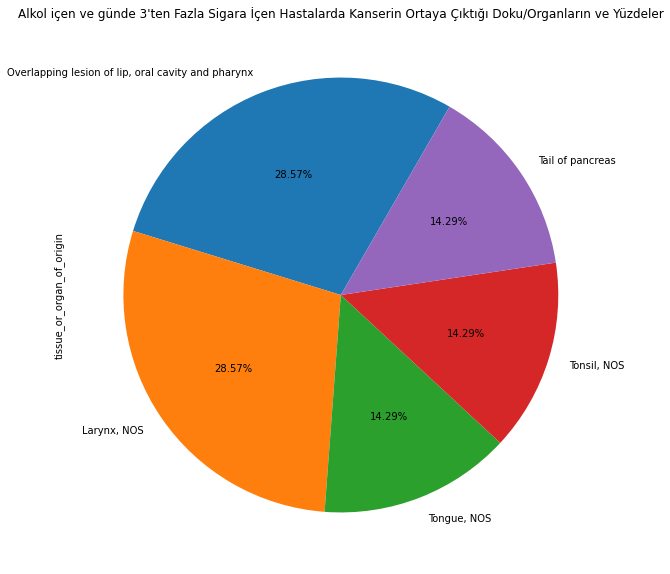

In [22]:
# Kanserin ilk ortaya çıktığı doku/organ yüzdeleri pasta grafiği yöntemiyle gösterildi.

plt.figure(figsize=(10,10)) 
ce_alcohol['tissue_or_organ_of_origin'].value_counts().plot.pie(autopct='%1.2f%%',startangle=60) 
plt.title("Alkol içen ve günde 3'ten Fazla Sigara İçen Hastalarda Kanserin Ortaya Çıktığı Doku/Organların ve Yüzdeler")                      

# Scikit-learn ile Makine Öğrenmesi
---

In [23]:
# Gerekli olduğu düşünülen öznitelikler belirlenerek cancer dataframe'inden yeni dataframe'e kopyalandı

cancer_dtd = cancer[['gender', 'primary_diagnosis', 'ajcc_pathologic_stage', 'age_at_diagnosis']].copy()
cancer_dtd

,gender,primary_diagnosis,ajcc_pathologic_stage,age_at_diagnosis
case_submitter_id,,,,
TCGA-CV-5970,male,"Squamous cell carcinoma, NOS",Stage IVA,21890.0
TCGA-BA-4074,male,"Squamous cell carcinoma, NOS",Stage IVA,25282.0
TCGA-CN-A642,male,"Squamous cell carcinoma, NOS",Stage IVB,21011.0
TCGA-2J-AABA,male,"Infiltrating duct carcinoma, NOS",Stage IIB,20133.0
TCGA-62-8398,male,Adenocarcinoma with mixed subtypes,Stage IIIA,20197.0
...,...,...,...,...
TCGA-3A-A9IZ,male,"Infiltrating duct carcinoma, NOS",Stage IIB,17294.0
TCGA-R5-A7ZF,female,"Adenocarcinoma, intestinal type",Stage IV,23908.0
TCGA-SC-A6LM,female,"Epithelioid mesothelioma, malignant",Stage IV,23400.0


In [24]:
# Derste gösterildiği şekilde one hot encoding yapıldı.

dummies_gender = pd.get_dummies(cancer_dtd.gender)
dummies_pdiagnosis = pd.get_dummies(cancer_dtd.primary_diagnosis)
dummies_ajcc = pd.get_dummies(cancer_dtd.ajcc_pathologic_stage)

cancer_dtd = pd.concat([cancer_dtd, dummies_gender], axis=1)
cancer_dtd = pd.concat([cancer_dtd, dummies_pdiagnosis], axis=1)
cancer_dtd = pd.concat([cancer_dtd, dummies_ajcc], axis=1)

cancer_dtd.drop(['gender', 'primary_diagnosis', 'ajcc_pathologic_stage'],axis=1,inplace=True)

cancer_dtd

,age_at_diagnosis,female,male,Acinar cell carcinoma,"Acral lentiginous melanoma, malignant",Adenocarcinoma with mixed subtypes,"Adenocarcinoma, NOS","Adenocarcinoma, intestinal type",Adrenal cortical carcinoma,Amelanotic melanoma,...,Stage III,Stage IIIA,Stage IIIB,Stage IIIC,Stage IS,Stage IV,Stage IVA,Stage IVB,Stage IVC,Stage X
case_submitter_id,,,,,,,,,,,,,,,,,,,,,
TCGA-CV-5970,21890.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
TCGA-BA-4074,25282.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
TCGA-CN-A642,21011.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
TCGA-2J-AABA,20133.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-62-8398,20197.0,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-3A-A9IZ,17294.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-R5-A7ZF,23908.0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
TCGA-SC-A6LM,23400.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [25]:
# Standart sapma üzerinden normalizasyon işlemi gerçekleştirildi.

cancer_dtd['age_at_diagnosis'] = ( cancer_dtd['age_at_diagnosis'].astype(float) - cancer_dtd['age_at_diagnosis'].astype(float).mean() ) / cancer_dtd['age_at_diagnosis'].astype(float).std()

cancer_dtd

,age_at_diagnosis,female,male,Acinar cell carcinoma,"Acral lentiginous melanoma, malignant",Adenocarcinoma with mixed subtypes,"Adenocarcinoma, NOS","Adenocarcinoma, intestinal type",Adrenal cortical carcinoma,Amelanotic melanoma,...,Stage III,Stage IIIA,Stage IIIB,Stage IIIC,Stage IS,Stage IV,Stage IVA,Stage IVB,Stage IVC,Stage X
case_submitter_id,,,,,,,,,,,,,,,,,,,,,
TCGA-CV-5970,-0.320199,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
TCGA-BA-4074,0.370961,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
TCGA-CN-A642,-0.499305,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
TCGA-2J-AABA,-0.678208,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-62-8398,-0.665167,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-3A-A9IZ,-1.256687,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-R5-A7ZF,0.090992,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
TCGA-SC-A6LM,-0.012519,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [26]:
# days to death sütunu df'e eklendi , tüm değerler float yapıldı.

temp = cancer['days_to_death'].copy()
cancer_dtd = pd.concat([cancer_dtd,temp], axis=1)
cancer_dtd[:] = cancer_dtd[:].astype(float)
cancer_dtd

,age_at_diagnosis,female,male,Acinar cell carcinoma,"Acral lentiginous melanoma, malignant",Adenocarcinoma with mixed subtypes,"Adenocarcinoma, NOS","Adenocarcinoma, intestinal type",Adrenal cortical carcinoma,Amelanotic melanoma,...,Stage IIIA,Stage IIIB,Stage IIIC,Stage IS,Stage IV,Stage IVA,Stage IVB,Stage IVC,Stage X,days_to_death
case_submitter_id,,,,,,,,,,,,,,,,,,,,,
TCGA-CV-5970,-0.320199,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,406.0
TCGA-BA-4074,0.370961,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,462.0
TCGA-CN-A642,-0.499305,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,82.0
TCGA-2J-AABA,-0.678208,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,607.0
TCGA-62-8398,-0.665167,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,444.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-3A-A9IZ,-1.256687,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,308.0
TCGA-R5-A7ZF,0.090992,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,259.0
TCGA-SC-A6LM,-0.012519,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,881.0


In [27]:
# Seperating the dependant and independent variables

X = cancer_dtd.iloc[:,:69]
Y = cancer_dtd.days_to_death

In [28]:
# Train-test split

from sklearn.model_selection import train_test_split,cross_val_score
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [29]:
# Learning a linear regression model

from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train,Y_train)

scores1 = cross_val_score(lr_model,X,Y,cv=10)
scores1

array([-7.35712400e+21, -2.75071672e+19, -3.38320029e+22, -4.27654492e+20,
       -4.34075103e+21, -1.45363457e+23, -3.18458020e+18, -7.83172719e+16,
       -5.69361558e+20, -3.56559763e+25])

In [30]:
# Evaluating the model

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
Y_pred = lr_model.predict(X_test)
mse_score = mean_squared_error(Y_test, Y_pred)
mae_score = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("MSE score:", mse_score)
print("MAE score:", mae_score)
print("R2 score:", r2)

MSE score: 3.738101623480544e+27
MAE score: 5181414655000.691
R2 score: -4.4045321635271714e+21


In [31]:
# Interpreting the coefficients

lr_model.coef_

array([-1.42412669e+02,  2.72577662e+15,  2.72577662e+15,  1.20170487e+14,
        1.20170487e+14,  1.20170487e+14,  1.20170487e+14,  1.20170487e+14,
        1.20170487e+14, -7.30065425e+14,  1.20170487e+14,  1.20170487e+14,
        1.20170487e+14,  1.20170487e+14,  1.20170487e+14,  1.20170487e+14,
        1.20170487e+14,  1.20170487e+14,  1.20170487e+14, -9.69650201e+13,
        1.20170487e+14,  1.20170487e+14,  1.20170487e+14,  1.20170487e+14,
        1.20170487e+14,  1.20170487e+14,  1.20170487e+14,  1.20170487e+14,
        1.20170487e+14,  1.20170487e+14,  1.20170487e+14,  1.20170487e+14,
        1.20170487e+14,  1.20170487e+14,  1.20170487e+14,  1.20170487e+14,
        1.20170487e+14,  1.20170487e+14,  1.20170487e+14,  1.20170487e+14,
        1.20170487e+14, -2.40093531e+13,  1.20170487e+14,  1.20170487e+14,
        1.20170487e+14,  1.20170487e+14,  1.20170487e+14,  1.20170487e+14,
        1.20170487e+14,  1.20170487e+14,  1.20170487e+14, -9.70860367e+14,
       -9.70860367e+14, -

###### Yorum:
Yukarıdaki çıktıya bakıldığında gender parametresinin sonuçta daha etkili olduğu görülmektedir.
###### 

In [32]:
# Öznitelikler değiştirilerek eğitim tekrarlandı

cancer_dtd2 = cancer[['race', 'primary_diagnosis', 'prior_treatment', 'prior_malignancy']].copy()
cancer_dtd2


dummies_race = pd.get_dummies(cancer_dtd2.race)
dummies_pdiagnosis = pd.get_dummies(cancer_dtd2.primary_diagnosis)
dummies_prior_treatment = pd.get_dummies(cancer_dtd2.prior_treatment)
dummies_prior_malignancy = pd.get_dummies(cancer_dtd2.prior_malignancy)

cancer_dtd2 = pd.concat([cancer_dtd2, dummies_gender], axis=1)
cancer_dtd2 = pd.concat([cancer_dtd2, dummies_pdiagnosis], axis=1)
cancer_dtd2 = pd.concat([cancer_dtd2, dummies_prior_treatment], axis=1)
cancer_dtd2 = pd.concat([cancer_dtd2, dummies_prior_malignancy], axis=1)

cancer_dtd2.drop(['race', 'primary_diagnosis', 'prior_treatment', 'prior_malignancy'],axis=1,inplace=True)


temp3 = cancer['days_to_death'].copy()
cancer_dtd2 = pd.concat([cancer_dtd2,temp3], axis=1)
cancer_dtd2[:] = cancer_dtd2[:].astype(float)
cancer_dtd2

X = cancer_dtd2.iloc[:,:54]
Y = cancer_dtd2.days_to_death

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

lr_model2 = LinearRegression()
lr_model2.fit(X_train,Y_train)

scores5 = cross_val_score(lr_model2,X,Y,cv=10)

Y_pred = lr_model2.predict(X_test)
mse_score = mean_squared_error(Y_test, Y_pred)
mae_score = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("MSE score:", mse_score)
print("MAE score:", mae_score)
print("R2 score:", r2)


MSE score: 6.958655359342627e+28
MAE score: 23490858183090.684
R2 score: -8.19924775522488e+22


In [33]:
lr_model2.coef_

array([-2.42799552e+17, -2.42799552e+17, -1.10972870e+15, -1.10972870e+15,
       -1.10972870e+15, -1.10972870e+15, -1.10972870e+15, -1.10972870e+15,
       -4.67521563e+15, -1.10972870e+15, -1.10972870e+15, -1.10972870e+15,
       -1.10972870e+15, -1.10972870e+15, -1.10972870e+15, -1.10972870e+15,
       -1.10972870e+15, -1.10972870e+15,  1.63901160e+14, -1.10972870e+15,
       -1.10972870e+15, -1.10972870e+15, -1.10972870e+15, -1.10972870e+15,
       -1.10972870e+15, -1.10972870e+15, -1.10972870e+15, -1.10972870e+15,
       -1.10972870e+15, -1.10972870e+15, -1.10972870e+15, -1.10972870e+15,
       -1.10972870e+15, -1.10972870e+15, -1.10972870e+15, -1.10972870e+15,
       -1.10972870e+15, -1.10972870e+15, -1.10972870e+15, -1.10972870e+15,
       -1.10972870e+15, -1.10972870e+15, -1.10972870e+15, -1.10972870e+15,
       -1.10972870e+15, -1.10972870e+15, -1.10972870e+15, -1.10972870e+15,
       -1.10972870e+15, -1.10972870e+15,  2.79422353e+15,  2.79422353e+15,
        1.03488916e+15,  

###### Yorum:
Yukarıdaki çıktıya baktığımızda prior_treatment ve prior_malignancy değerlerinin sonuçta daha etkili olduğu görülmüştür.
###### 

## Soru B.2: Bir hastaya uygulanan tedavi yönteminin (treatment_type) tahminlenmesi (30p)

In [34]:
# Gerekli olduğu düşünülen öznitelikler belirlenerek cancer dataframe'inden yeni dataframe'e kopyalandı

cancer_tt = cancer[['primary_diagnosis', 'ajcc_pathologic_stage', 'age_at_diagnosis', 'tissue_or_organ_of_origin']].copy()
cancer_tt

,primary_diagnosis,ajcc_pathologic_stage,age_at_diagnosis,tissue_or_organ_of_origin
case_submitter_id,,,,
TCGA-CV-5970,"Squamous cell carcinoma, NOS",Stage IVA,21890.0,"Tongue, NOS"
TCGA-BA-4074,"Squamous cell carcinoma, NOS",Stage IVA,25282.0,"Tongue, NOS"
TCGA-CN-A642,"Squamous cell carcinoma, NOS",Stage IVB,21011.0,"Tongue, NOS"
TCGA-2J-AABA,"Infiltrating duct carcinoma, NOS",Stage IIB,20133.0,Head of pancreas
TCGA-62-8398,Adenocarcinoma with mixed subtypes,Stage IIIA,20197.0,"Lower lobe, lung"
...,...,...,...,...
TCGA-3A-A9IZ,"Infiltrating duct carcinoma, NOS",Stage IIB,17294.0,Head of pancreas
TCGA-R5-A7ZF,"Adenocarcinoma, intestinal type",Stage IV,23908.0,Gastric antrum
TCGA-SC-A6LM,"Epithelioid mesothelioma, malignant",Stage IV,23400.0,"Pleura, NOS"


In [35]:
# Derste gösterildiği şekilde one hot encoding yapıldı.

dummies_primary_diagnosis = pd.get_dummies(cancer_tt.primary_diagnosis)
dummies_ajcc = pd.get_dummies(cancer_tt.ajcc_pathologic_stage)
dummies_tissue = pd.get_dummies(cancer_tt.tissue_or_organ_of_origin)

cancer_tt = pd.concat([cancer_tt, dummies_primary_diagnosis], axis=1)
cancer_tt = pd.concat([cancer_tt, dummies_ajcc], axis=1)
cancer_tt = pd.concat([cancer_tt, dummies_tissue], axis=1)

cancer_tt.drop(['primary_diagnosis','ajcc_pathologic_stage', 'tissue_or_organ_of_origin'],axis=1,inplace=True)

In [36]:
# Standart sapma üzerinden normalizasyon işlemi gerçekleştirildi.

cancer_tt['age_at_diagnosis'] = ( cancer_tt['age_at_diagnosis'].astype(float) - cancer_tt['age_at_diagnosis'].astype(float).mean() ) / cancer_tt['age_at_diagnosis'].astype(float).std()

# Değerler float yapıldı.

cancer_tt[:] = cancer_tt[:].astype(float)
cancer_tt

,age_at_diagnosis,Acinar cell carcinoma,"Acral lentiginous melanoma, malignant",Adenocarcinoma with mixed subtypes,"Adenocarcinoma, NOS","Adenocarcinoma, intestinal type",Adrenal cortical carcinoma,Amelanotic melanoma,Basaloid squamous cell carcinoma,"Bronchiolo-alveolar carcinoma, non-mucinous",...,Tail of pancreas,"Testis, NOS",Thyroid gland,"Tongue, NOS","Tonsil, NOS",Transverse colon,Trigone of bladder,Upper Gum,"Upper lobe, lung",Upper-outer quadrant of breast
case_submitter_id,,,,,,,,,,,,,,,,,,,,,
TCGA-CV-5970,-0.320199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-BA-4074,0.370961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-CN-A642,-0.499305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-2J-AABA,-0.678208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-62-8398,-0.665167,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-3A-A9IZ,-1.256687,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-R5-A7ZF,0.090992,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-SC-A6LM,-0.012519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# Treatment type sütunu df'e eklendi

temp2 = cancer['treatment_type'].copy()
cancer_tt = pd.concat([cancer_tt,temp2], axis=1)

cancer_tt

,age_at_diagnosis,Acinar cell carcinoma,"Acral lentiginous melanoma, malignant",Adenocarcinoma with mixed subtypes,"Adenocarcinoma, NOS","Adenocarcinoma, intestinal type",Adrenal cortical carcinoma,Amelanotic melanoma,Basaloid squamous cell carcinoma,"Bronchiolo-alveolar carcinoma, non-mucinous",...,"Testis, NOS",Thyroid gland,"Tongue, NOS","Tonsil, NOS",Transverse colon,Trigone of bladder,Upper Gum,"Upper lobe, lung",Upper-outer quadrant of breast,treatment_type
case_submitter_id,,,,,,,,,,,,,,,,,,,,,
TCGA-CV-5970,-0.320199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"Radiation Therapy, NOS"
TCGA-BA-4074,0.370961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"Radiation Therapy, NOS"
TCGA-CN-A642,-0.499305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"Radiation Therapy, NOS"
TCGA-2J-AABA,-0.678208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Radiation Therapy, NOS"
TCGA-62-8398,-0.665167,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Pharmaceutical Therapy, NOS"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-3A-A9IZ,-1.256687,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Radiation Therapy, NOS"
TCGA-R5-A7ZF,0.090992,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Radiation Therapy, NOS"
TCGA-SC-A6LM,-0.012519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Pharmaceutical Therapy, NOS"


In [38]:
# Seperating the dependant and independent variables

X = cancer_tt.iloc[:,:127]
Y = cancer_tt.treatment_type

In [39]:
# Train-test split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [40]:
# Random forest classification

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

RFC = RandomForestClassifier(max_depth=14, random_state=0)
RFC.fit(X_train,Y_train)
test_sonuc1 = RFC.predict(X_test)
# Decision Tree Classification
DTC = DecisionTreeClassifier(random_state=(0))
DTC.fit(X_train,Y_train)
test_sonuc2 = RFC.predict(X_test)


# Random forest cross validation sonuçları

scores1 = cross_val_score(RFC,X,Y,cv=10)
scores1


array([0.49514563, 0.50485437, 0.51456311, 0.54368932, 0.45631068,
       0.55339806, 0.55339806, 0.49019608, 0.5       , 0.54901961])

In [41]:
# Decision tree cross validation sonuçları

scores2 = cross_val_score(DTC,X,Y,cv=10)
scores2


array([0.48543689, 0.4368932 , 0.52427184, 0.54368932, 0.59223301,
       0.53398058, 0.53398058, 0.5       , 0.48039216, 0.54901961])

###### Yorumumuz;
Random Forest'ın daha iyi sonuç verdiği gözlenmiştir.
###### 

In [42]:
# Model doğruluğu yazdırıldı.

print("Modelin doğruluğu/Accuracy :",scores2.mean())

Modelin doğruluğu/Accuracy : 0.5179897201599086


In [43]:
# Hiperparametreler kullanıldı.

from  sklearn  import linear_model
from sklearn.model_selection import GridSearchCV

C=np.logspace(0,4,num=10)
penalty =["l1","l2"]
solver=["saga","liblinear","destan"]

hyperparameters=dict(C=C, penalty=penalty, solver=solver)

logistic=linear_model.LogisticRegression()

gridsearch=GridSearchCV(logistic,hyperparameters)

best_model_grid=gridsearch.fit(X_train,Y_train)

C:\Users\C.Cesur\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\C.Cesur\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\C.Cesur\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\C.Cesur\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\C.Cesur\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\C.Cesur\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: T

C:\Users\C.Cesur\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\C.Cesur\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\C.Cesur\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\C.Cesur\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\C.Cesur\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\C.Cesur\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: T

In [44]:
# En iyi sonucu veren hiperparametre yazdırıldı.

print("En iyi sonuç veren hiperparametre:",best_model_grid.best_estimator_)

En iyi sonuç veren hiperparametre: LogisticRegression(penalty='l1', solver='saga')


In [45]:
# Modelin doğruluğu yazdırıldı.

print("Modelin doğruluğu/Accuracy :",best_model_grid.best_score_)

Modelin doğruluğu/Accuracy : 0.48111603843311157


In [46]:
# Modelin etkinliği test verileriyle ölçüldü.
from sklearn.metrics import accuracy_score
test_sonuc = gridsearch.predict(X_test)
accuracy_score(test_sonuc,Y_test)

0.5242718446601942

#### 
_made by Ersin&Cemil_
#### 